In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
da=pd.read_csv("customer.csv")
df=pd.DataFrame(da)
display(df)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


## Data processing..

In [3]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [5]:
print("shape :",df.shape)
print("size :",df.size)
print("ndim :",df.ndim)

shape : (850, 10)
size : 8500
ndim : 2


In [6]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

## check the isnull value..

In [7]:
df.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [8]:
df["Defaulted"].fillna(value=df["Defaulted"].mean(),inplace=True)# fill the null value and get the clear data..

In [9]:
df.isna().sum() 

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [10]:
nu=df.select_dtypes(include=["float","int"]) # select the numerical data..
num=nu.iloc[:,1:10]
num

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.000000,6.3
1,47,1,26,100,4.582,8.218,0.000000,12.8
2,33,2,10,57,6.111,5.802,1.000000,20.9
3,29,2,4,19,0.681,0.516,0.000000,6.3
4,47,1,31,253,9.308,8.908,0.000000,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.261429,6.8
846,28,2,7,34,0.359,2.021,0.000000,7.0
847,25,4,0,18,2.802,3.210,1.000000,33.4
848,32,1,12,28,0.116,0.696,0.000000,2.9


In [11]:
cat=df.select_dtypes(include=["object"]) # select the numerical data..
cat

,Address
0,NBA001
1,NBA021
2,NBA013
3,NBA009
4,NBA008
...,...
845,NBA007
846,NBA002
847,NBA001
848,NBA012


## EDA analysis..

In [12]:
num.shape

(850, 8)

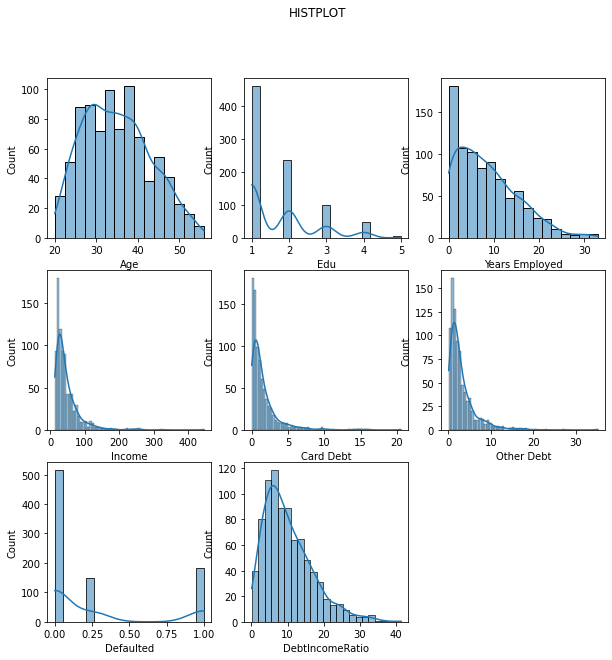

In [13]:
plt.figure(figsize=(10,10))
no=1
for i in num:
    if no<=9:
        plt.suptitle("HISTPLOT")
        plt.subplot(3,3,no)
        sns.histplot(x=num[i],kde=True)
        plt.xlabel(i)
    no+=1

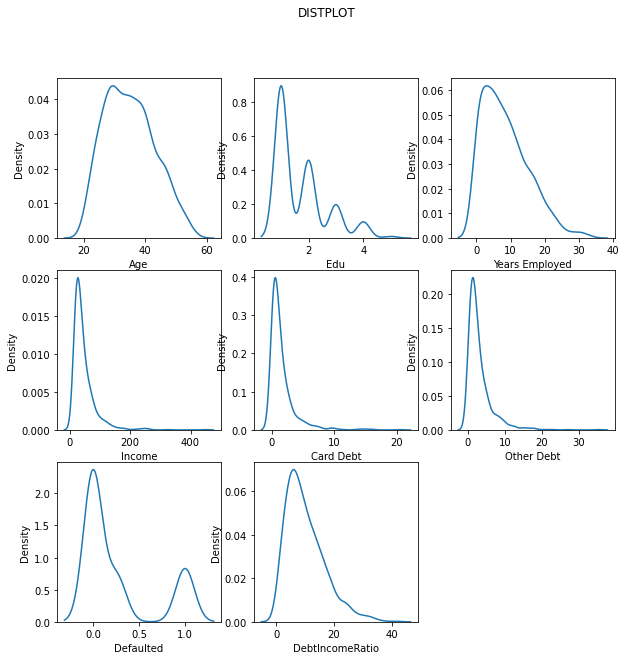

In [14]:
plt.figure(figsize=(10,10))
no=1
for i in num:
    if no<=9:
        plt.suptitle("DISTPLOT")
        plt.subplot(3,3,no)
        sns.distplot(x=num[i],hist=False)
        plt.xlabel(i)
    no+=1

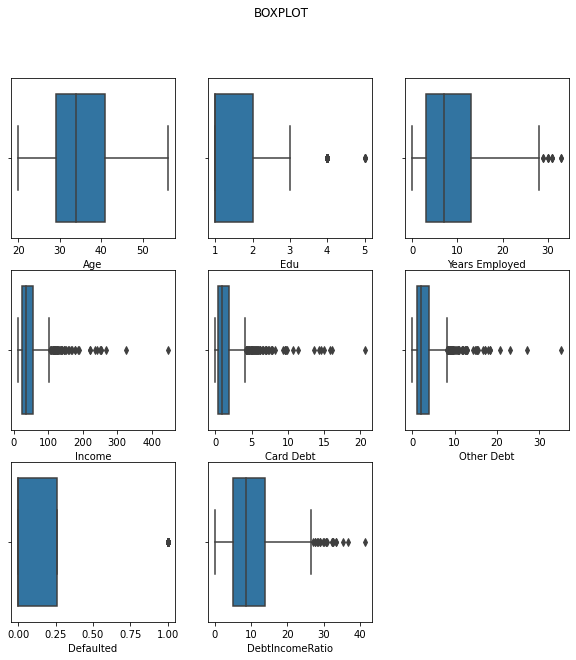

In [15]:
plt.figure(figsize=(10,10))
no=1
for i in num:
    if no<=9:
        plt.suptitle("BOXPLOT")
        plt.subplot(3,3,no)
        sns.boxplot(x=num[i],data=df)
        plt.xlabel(i)
    no+=1

In [16]:
num.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Income'>

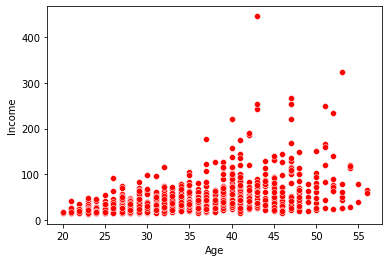

In [17]:
sns.scatterplot(x="Age",y="Income",data=df,palette=True,markers="*",color=["red"])

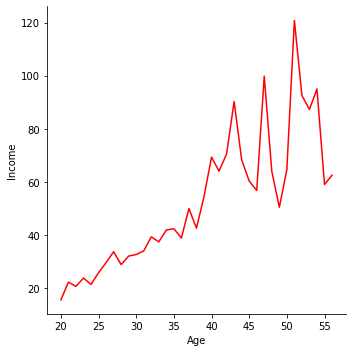

In [18]:
sns.relplot(x="Age",y="Income",data=df,color="red",kind="line",ci=None)

## outlier hanling method..

In [19]:
# iqr  method..
q1=np.percentile(df["Income"],25,interpolation="midpoint")
q2=np.percentile(df["Income"],50,interpolation="midpoint")
q3=np.percentile(df["Income"],75,interpolation="midpoint")
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df[(df["Income"]>upper)|(df["Income"]<lower)].shape

(53, 10)

In [20]:
len(df.loc[df["Income"]>upper])/len(df)*100

6.235294117647059

In [28]:
df=df[(df["Income"]<upper)&(df["Income"]>lower)]

In [29]:
df.shape

(797, 10)

## Create the model.. 

In [30]:
num

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.000000,6.3
1,47,1,26,100,4.582,8.218,0.000000,12.8
2,33,2,10,57,6.111,5.802,1.000000,20.9
3,29,2,4,19,0.681,0.516,0.000000,6.3
4,47,1,31,253,9.308,8.908,0.000000,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.261429,6.8
846,28,2,7,34,0.359,2.021,0.000000,7.0
847,25,4,0,18,2.802,3.210,1.000000,33.4
848,32,1,12,28,0.116,0.696,0.000000,2.9


In [31]:
sc=StandardScaler()
sc.fit_transform(num)

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.65560267, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.65560267,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.85216712,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.85216712,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.65560267, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.65560267, -0.2340332 ]])

Text(0.5, 1.0, 'Elbow method')

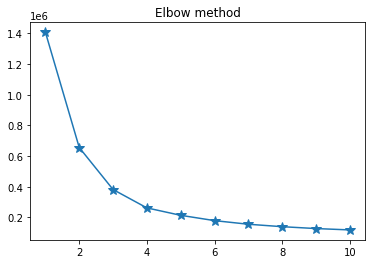

In [50]:
# elbow method to find the value..
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=10,max_iter=1000)
    model.fit(num)
    wcss.append(model.inertia_)#(sumation of (x)-(i)^2)
plt.plot(range(1,11),wcss,marker="*",markersize=10)
plt.title("Elbow method")

In [51]:
model=KMeans(n_clusters=2,random_state=4,max_iter=1000,init="random", n_init=10)
model.fit(num)
model.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(num,model.labels_)

0.6857568681460449

In [35]:
model.inertia_

655923.8749703877

In [36]:
model.cluster_centers_

array([[ 34.09138381,   1.65926893,   7.45039164,  36.95430809,
          1.29533159,   2.51584987,   0.26760537,  10.24699739],
       [ 43.58333333,   2.17857143,  18.73809524, 135.32142857,
          4.14372619,   8.21209524,   0.20510204,   9.48452381]])

## DBSCAN method..

In [41]:
model1=SpectralClustering(n_clusters=2)
model1.fit(num)
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
silhouette_score(num,model1.labels_)

0.6245966201962209

In [66]:
model2=AgglomerativeClustering(linkage='ward',n_clusters=2)
model2.fit(num)
model2.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
silhouette_score(num,model2.labels_)

0.7041974534569699

In [68]:
df["cluster"]=pd.DataFrame(model2.labels_)

In [70]:
df.drop(["Address","Customer Id"],axis=1,inplace=True)

In [71]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.000000,6.3,0
1,47,1,26,100,4.582,8.218,0.000000,12.8,1
2,33,2,10,57,6.111,5.802,1.000000,20.9,0
3,29,2,4,19,0.681,0.516,0.000000,6.3,0
5,40,1,23,81,0.998,7.831,0.261429,10.9,0
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.261429,6.8,0
846,28,2,7,34,0.359,2.021,0.000000,7.0,0
847,25,4,0,18,2.802,3.210,1.000000,33.4,0
848,32,1,12,28,0.116,0.696,0.000000,2.9,0
